# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan dalam contoh kode ini adalah Covid dataset. Dataset diunduh menggunakan KaggleHub dan dipindahkan ke folder data/raw agar konsisten dengan struktur proyek dan kompatibel dengan proses otomatisasi serta workflow GitHub Actions.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import kagglehub
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print(path)
!ls $path

100%|██████████| 19.0M/19.0M [00:01<00:00, 10.1MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166
country_wise_latest.csv      day_wise.csv      usa_county_wise.csv
covid_19_clean_complete.csv  full_grouped.csv  worldometer_data.csv


In [3]:
!mkdir -p data/raw
!cp $path/*.csv data/raw/

In [4]:
data_path = "data/raw/day_wise.csv"
df = pd.read_csv(data_path)

df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


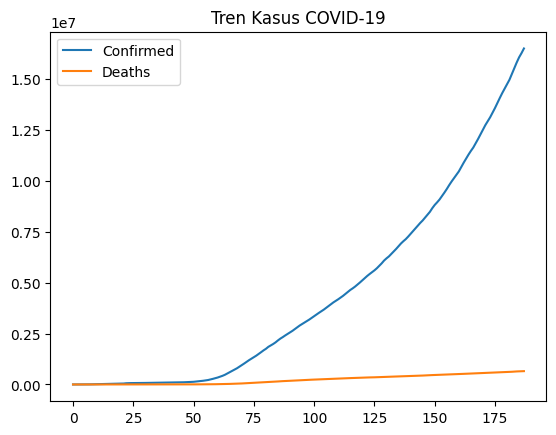

In [6]:
# Visualisasi tren kasus
plt.figure()
plt.plot(df["Confirmed"], label="Confirmed")
plt.plot(df["Deaths"], label="Deaths")
plt.legend()
plt.title("Tren Kasus COVID-19")
plt.show()

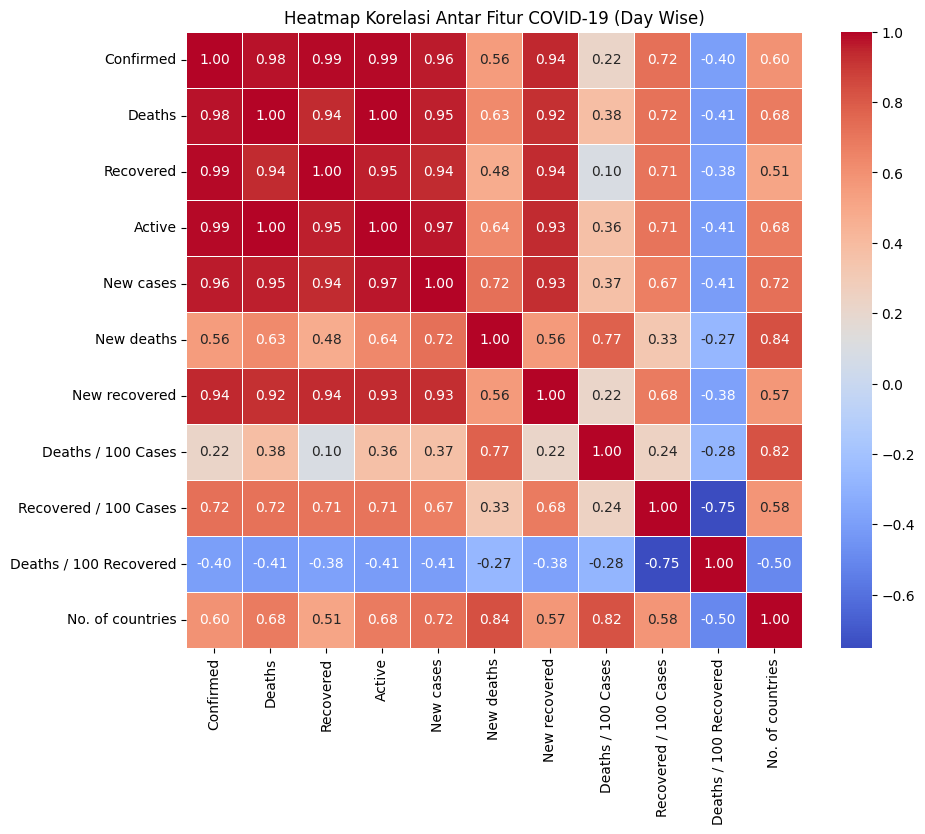

In [7]:
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Hitung korelasi
corr_matrix = df_numeric.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Heatmap Korelasi Antar Fitur COVID-19 (Day Wise)")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
df = df.drop(columns=["Date"], errors="ignore")

df = df.fillna(method="ffill")

df = df.drop_duplicates()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

df_processed = pd.DataFrame(scaled_data, columns=df.columns)

df_processed.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.198444,0.059921,0.424826,0.000000
1,0.000006,0.000002,2.112365e-07,0.000015,0.000350,0.000100,0.000007,0.138132,0.051668,0.419287,0.011050
2,0.000023,0.000014,8.449461e-07,0.000058,0.001015,0.000803,0.000021,0.140078,0.038034,0.514629,0.016575
3,0.000053,0.000038,1.161801e-06,0.000133,0.001744,0.001605,0.000011,0.173152,0.018120,0.791371,0.027624
4,0.000095,0.000060,2.534838e-06,0.000236,0.002419,0.001405,0.000046,0.116732,0.013455,0.791371,0.038674
